# LetsGrowMore Intership

### Intermediate Level Task 3 Exploratory Data Analysis on Dataset - Terrorism 

### As a security/defenes analyst, try to find out the hot zone of terrorism 

### Dataset Link: https://bit.ly/2TK5Xn5

### Author : Vanshika Kapoor

### Importing the Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#jupyter notebook will ignore all the warning
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [4]:
terror_data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='latin1')


In [5]:
terror_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
terror_data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### Getting the size of Database

In [7]:
print("Number of rows in Dataset: ", terror_data.shape[0])
print("Number of columns in Dataset: ", terror_data.shape[1])

Number of rows in Dataset:  181691
Number of columns in Dataset:  135


### All the Columns Name of the Dataset 

In [8]:
columns = terror_data.columns.tolist()
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

### Renaming the Columns

In [9]:
df = pd.DataFrame(terror_data, terror_data.rename(columns={ 'success': 'Success', 'location': 'Location', 'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'country': 'Country_code', 'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True))

In [10]:
df.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,Country_code,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Checking the Null Values

In [11]:

df =  df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude','Location','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive', 'Success']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   City         181257 non-null  object 
 8   Latitude     177135 non-null  float64
 9   Longitude    177134 non-null  float64
 10  Location     55495 non-null   object 
 11  AttackType   181691 non-null  object 
 12  Killed       171378 non-null  float64
 13  Wounded      165380 non-null  float64
 14  Target       181055 non-null  object 
 15  Summary      115562 non-null  object 
 16  Group        181691 non-null  object 
 17  Target_type  181691 non-null  object 
 18  Weapon_type  181691 non-

In [13]:
df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
Location       126196
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Success             0
dtype: int64

### Exploratory Data Analysis and Data Visualization 

In [14]:
corr = df.corr()

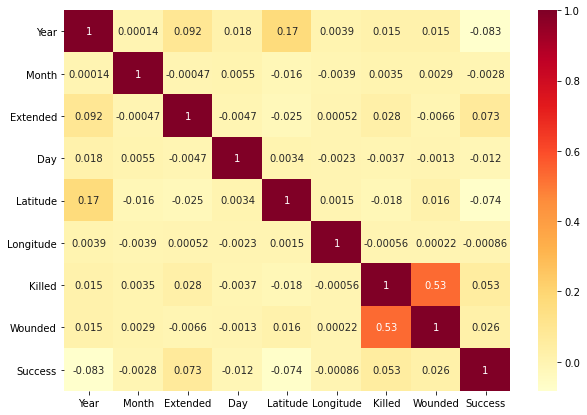

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot =  True, cmap = 'YlOrRd')
plt.show()

In [16]:
print("Country with the most attacks:-",terror_data['Country'].value_counts().idxmax())
print("City with the most attacks:-",terror_data['City'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:-",terror_data['Region'].value_counts().idxmax())
print("Year with the most attacks:-",terror_data['Year'].value_counts().idxmax())
print("Month with the most attacks:-",terror_data['Month'].value_counts().idxmax())
print("Group with the most attacks:-",terror_data['Group'].value_counts().index[1])
print("Most Attack Types:-",terror_data['AttackType'].value_counts().idxmax())

Country with the most attacks:- Iraq
City with the most attacks:- Baghdad
Region with the most attacks:- Middle East & North Africa
Year with the most attacks:- 2014
Month with the most attacks:- 5
Group with the most attacks:- Taliban
Most Attack Types:- Bombing/Explosion


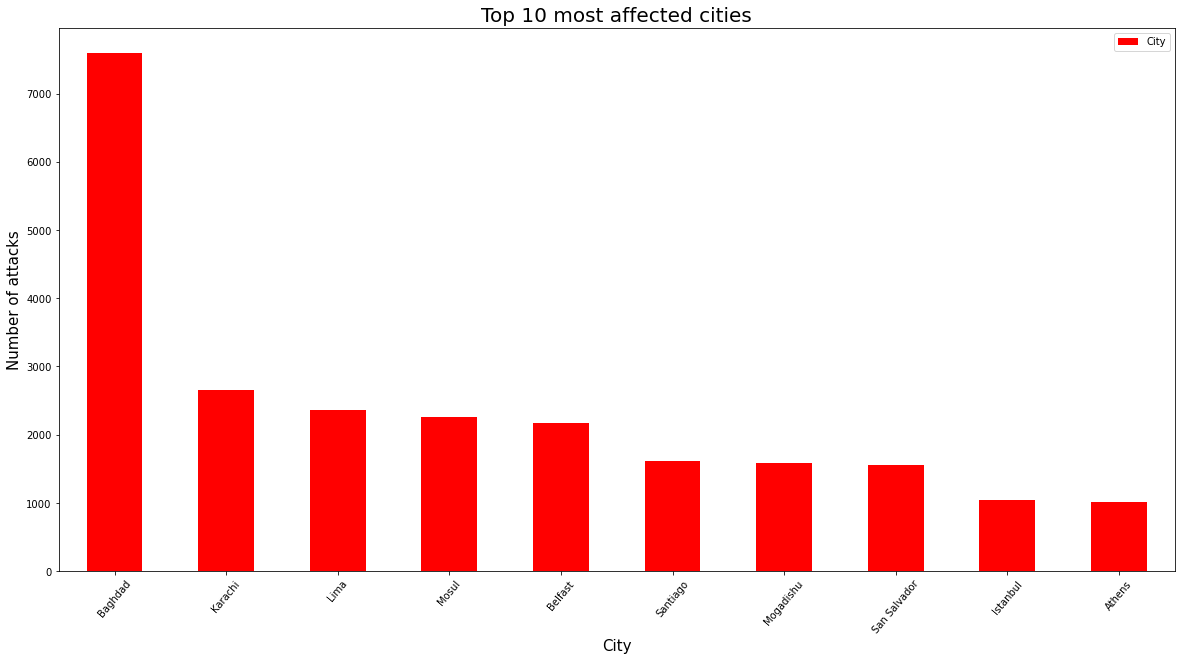

In [17]:
terror_data['City'].value_counts().to_frame().drop('Unknown').sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected cities",fontsize=20)
plt.show()

#### Country with most attacks

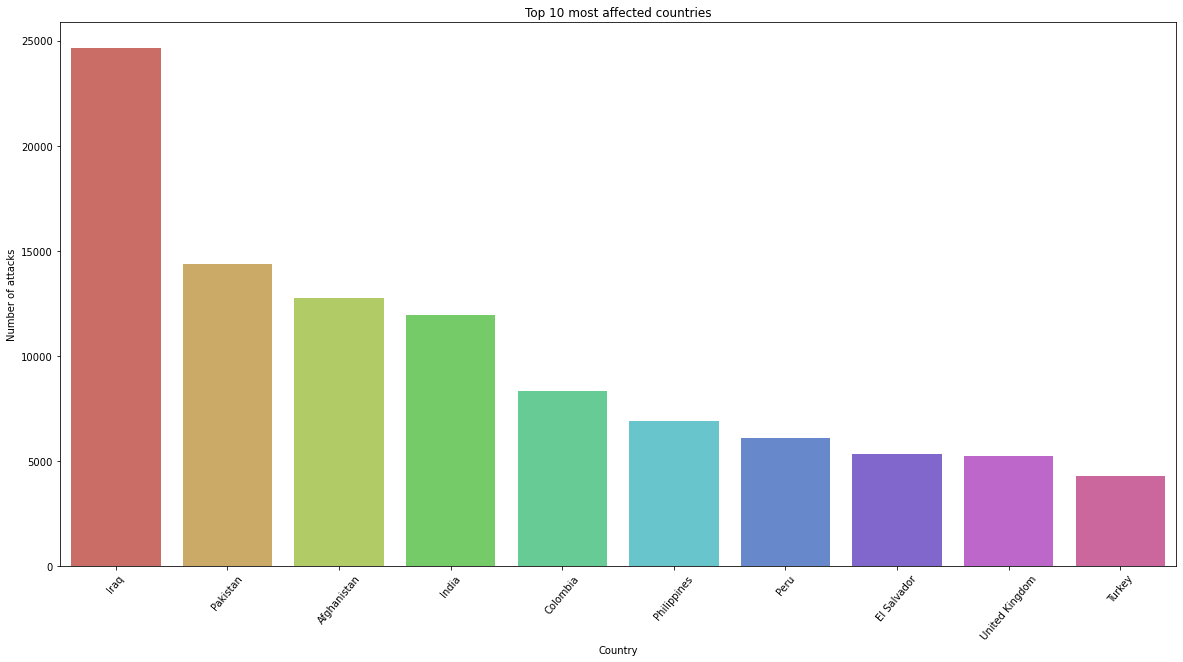

In [18]:
plt.subplots(figsize=(20,10))
sns.barplot(terror_data['Country'].value_counts()[:10].index,terror_data['Country'].value_counts()[:10].values,palette='hls')
plt.title('Top 10 most affected countries')
plt.xlabel('Country')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 50)
plt.show()

#### Region with most Attacks

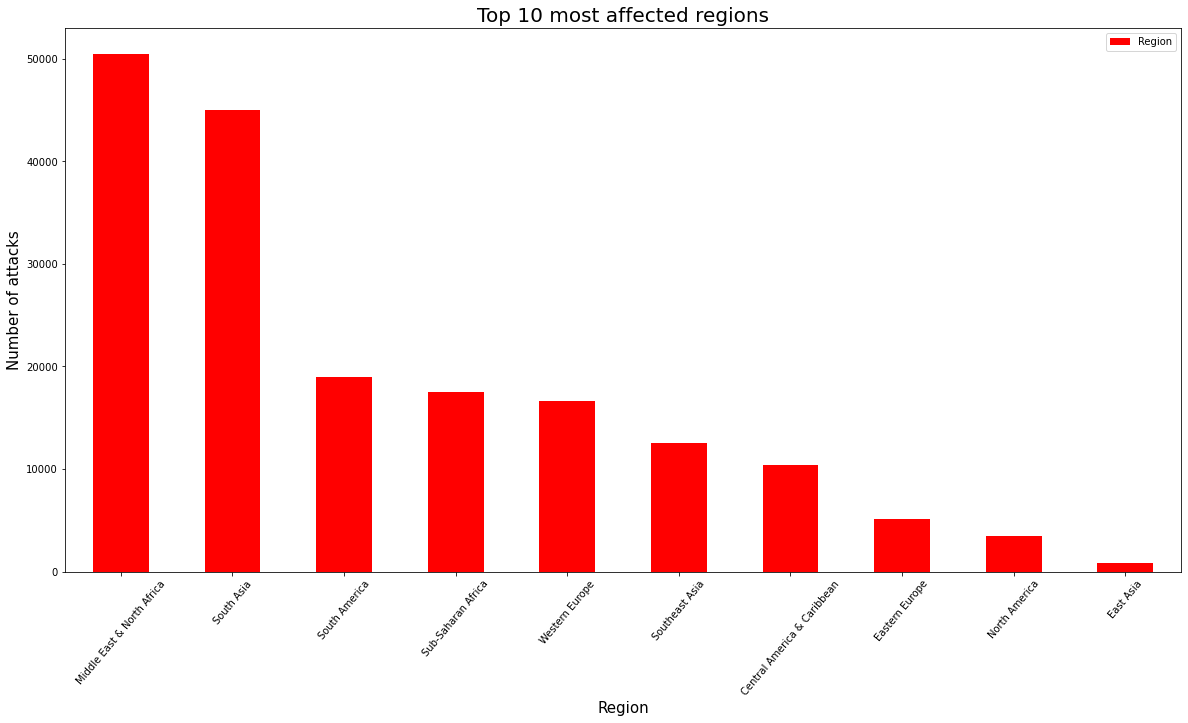

In [19]:
terror_data['Region'].value_counts().to_frame().sort_values('Region',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected regions",fontsize=20)
plt.show()

#### Groups with most attacks

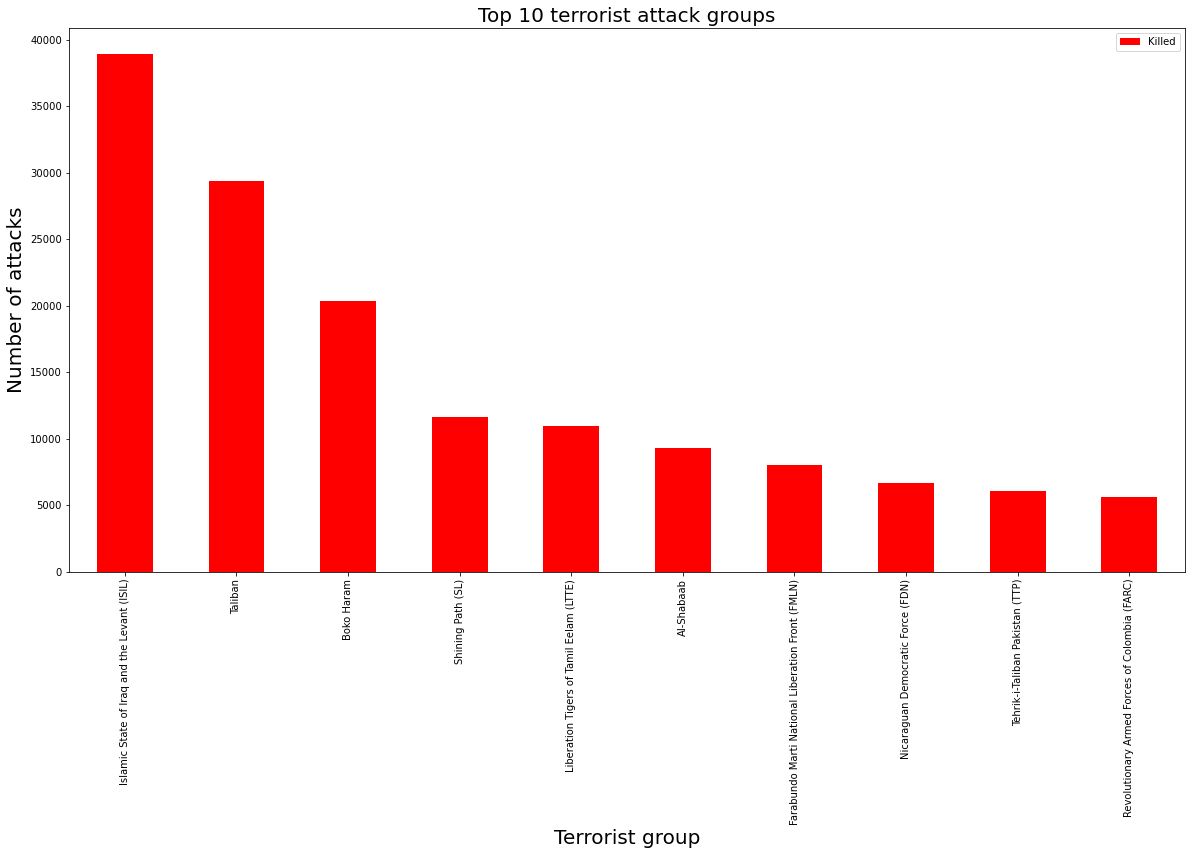

In [20]:
terror_data[['Group','Killed']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('Killed',ascending=False).head(10).plot(kind='bar',color='red',figsize=(20,10))
plt.title("Top 10 terrorist attack groups",fontsize=20)
plt.xlabel("Terrorist group",fontsize=20)
plt.ylabel("Number of attacks",fontsize=20)
plt.show()

#### Target types with most attacks

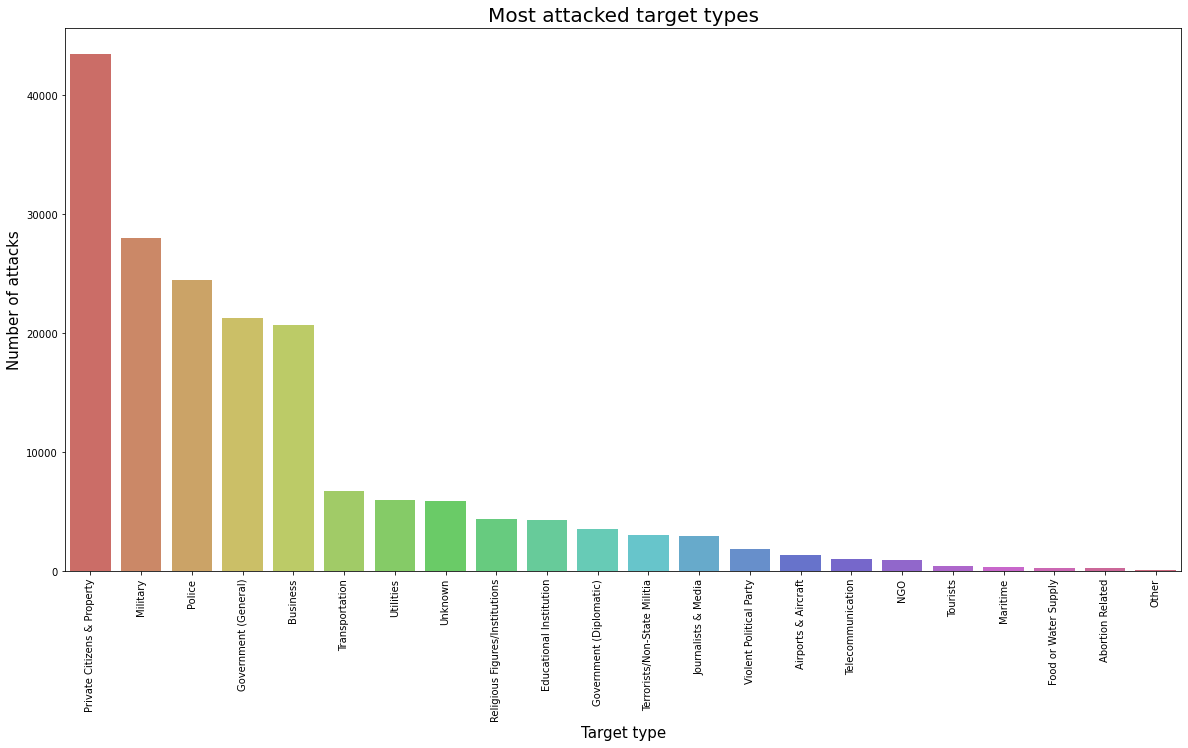

In [21]:
plt.subplots(figsize=(20,10))
sns.countplot(terror_data["Target_type"],order=terror_data['Target_type'].value_counts().index,palette="hls");
plt.xticks(rotation=90)
plt.xlabel("Target type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most attacked target types",fontsize=20)
plt.show()

#### Attack type with most attacks

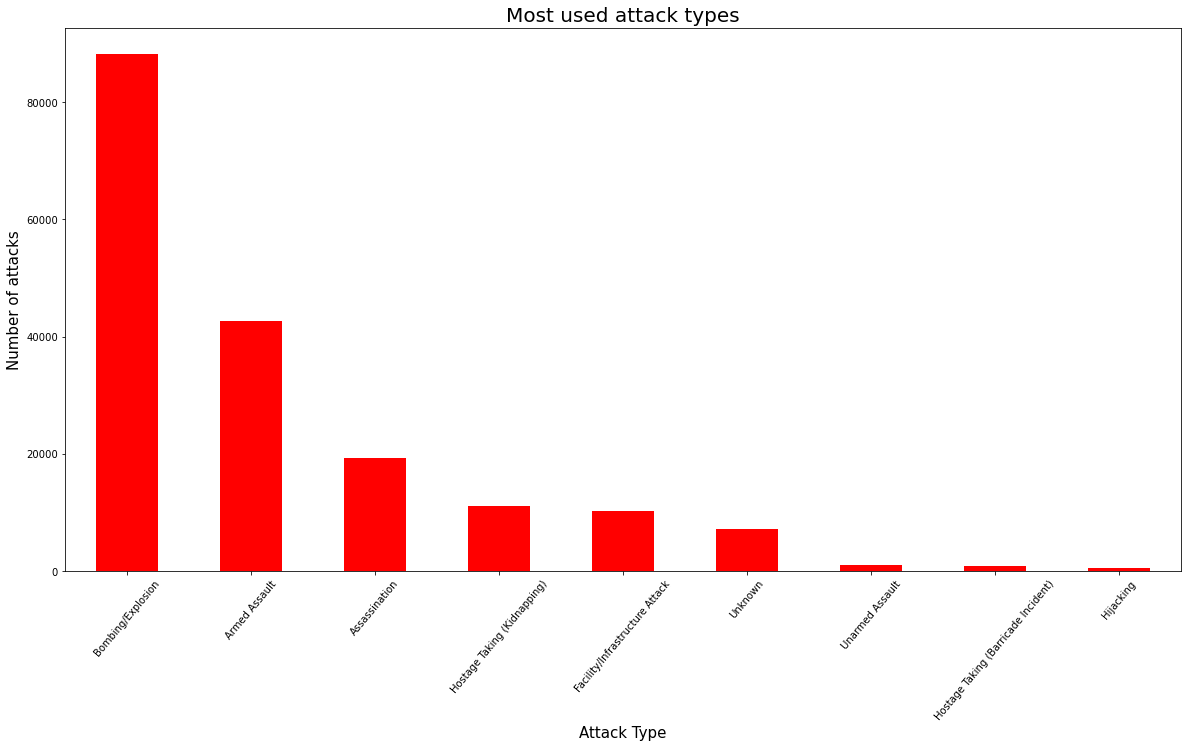

In [22]:
terror_data['AttackType'].value_counts().plot(kind='bar',figsize=(20,10),color='red')
plt.xticks(rotation = 50)
plt.xlabel("Attack Type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most used attack types",fontsize=20)
plt.show()

### Conclusion 


Most attacked city - Baghdad

Most attacked country - Iraq

Most attacked region - Middle East and North Africa

Terrorist group with most attacks - Islamic State of Iraq and the Levant (ISIL)

Most attacked target type - Private Citizens and Property

Most used attack type - Bombing/Explosion